In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf


In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:

stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [6]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-01-28,4.723758,4.831962,4.624488,4.715815,490158373
2005-01-31,4.854795,4.873159,4.758006,4.806897,385306832
2005-02-01,4.762473,4.880605,4.730955,4.824020,756384528
2005-02-02,5.111406,5.380427,5.054326,5.349406,1316889593
2005-02-03,5.233012,5.295305,5.107684,5.112151,521471303


In [7]:
google_data.describe

<bound method NDFrame.describe of Price            Close        High         Low        Open      Volume
Ticker            GOOG        GOOG        GOOG        GOOG        GOOG
Date                                                                  
2005-01-28    4.723758    4.831962    4.624488    4.715815   490158373
2005-01-31    4.854795    4.873159    4.758006    4.806897   385306832
2005-02-01    4.762473    4.880605    4.730955    4.824020   756384528
2005-02-02    5.111406    5.380427    5.054326    5.349406  1316889593
2005-02-03    5.233012    5.295305    5.107684    5.112151   521471303
...                ...         ...         ...         ...         ...
2025-01-21  199.630005  203.839996  199.440002  200.509995    19005200
2025-01-22  200.029999  202.119995  199.199997  200.550003    15477400
2025-01-23  199.580002  201.940002  196.820007  199.979996    15170800
2025-01-24  201.899994  202.570007  199.783997  199.850006    12712800
2025-01-27  193.770004  198.669998  192.703

In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-01-28 to 2025-01-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [9]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

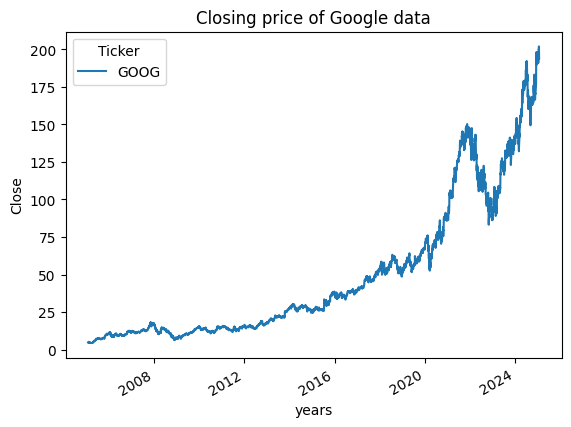

In [11]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [13]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

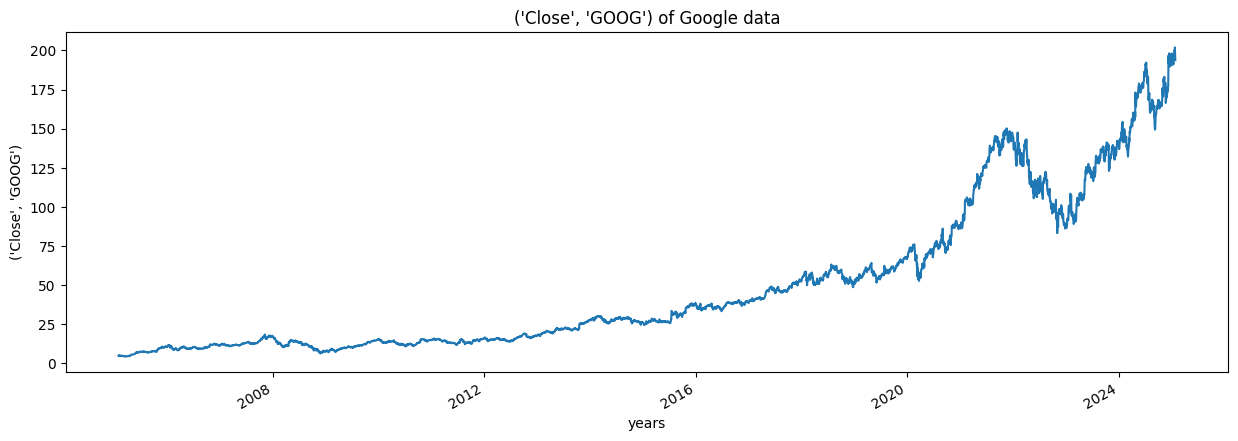

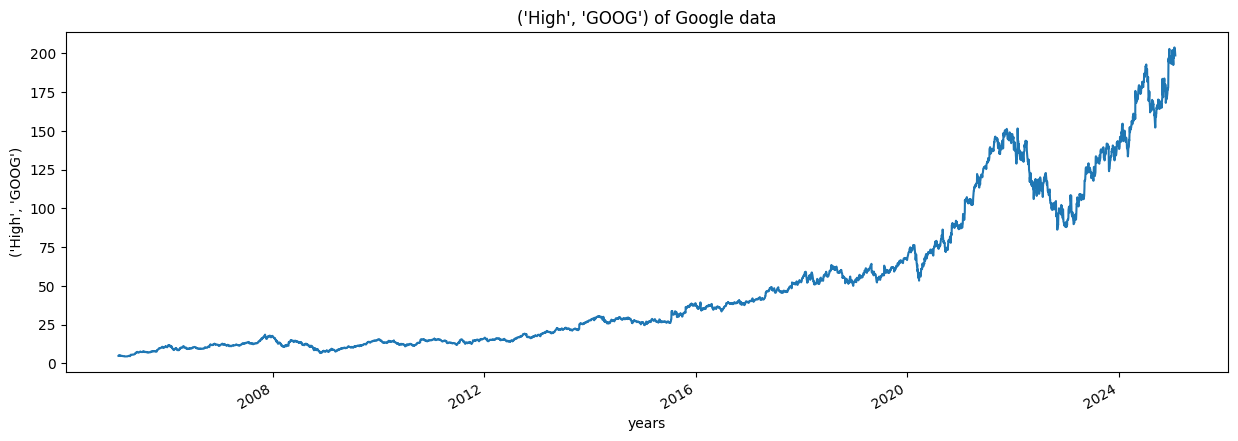

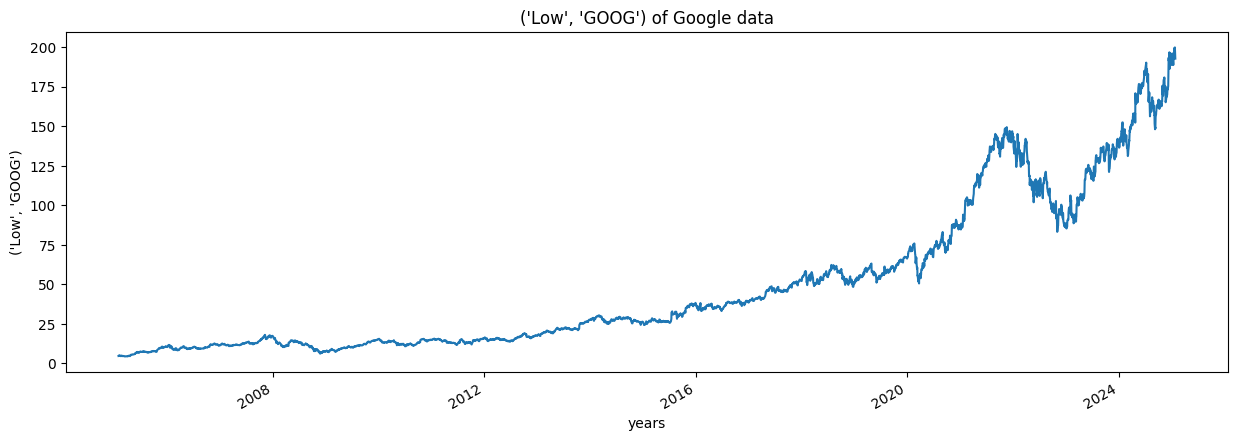

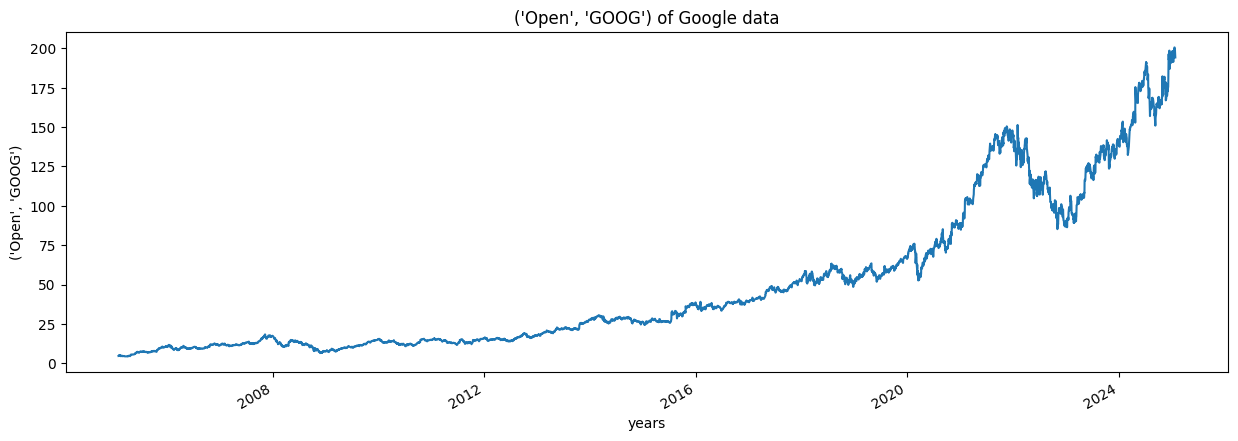

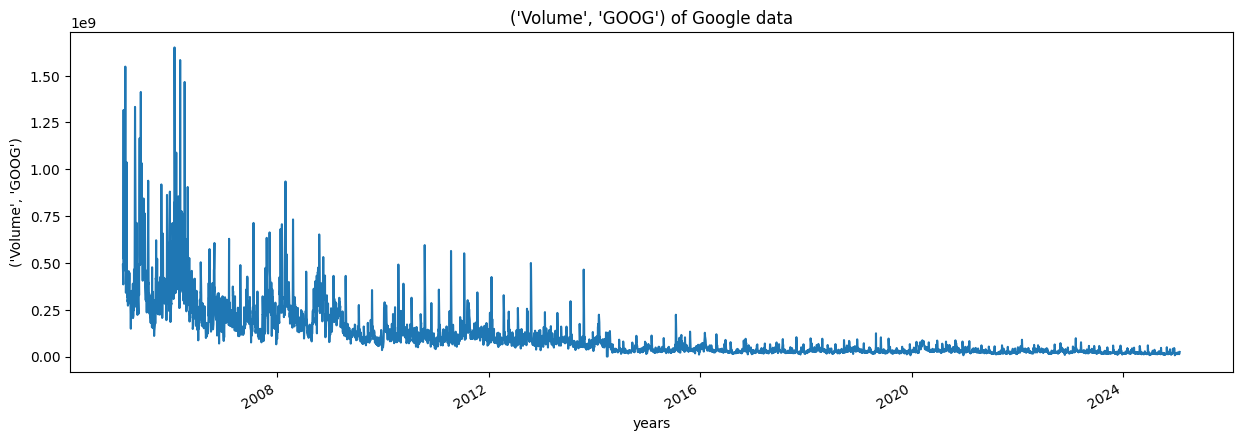

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
for i in range(2004,2026):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 234
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 16


In [19]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [20]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-01-19         NaN
2006-01-20         NaN
2006-01-23         NaN
2006-01-24         NaN
2006-01-25    7.317316
Name: MA_for_250_days, dtype: float64

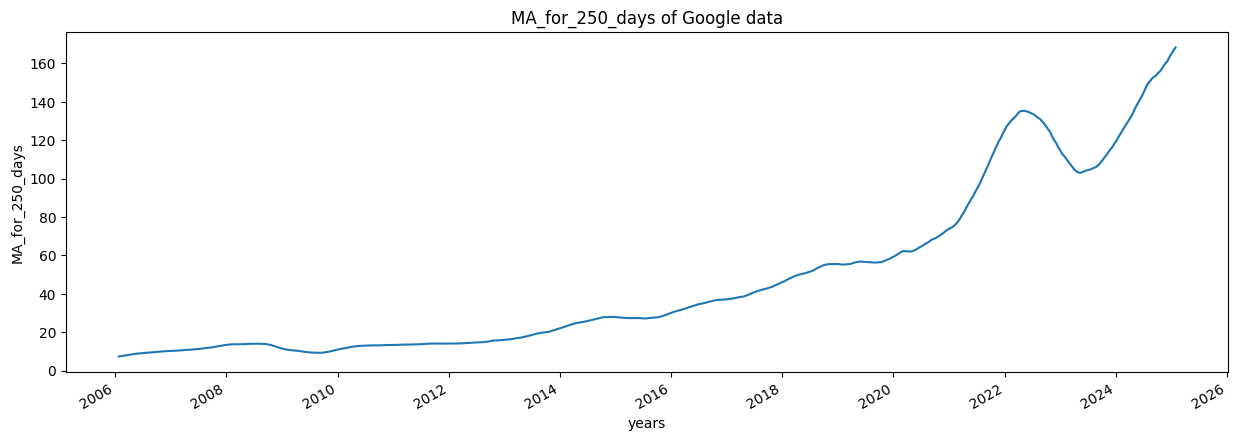

In [21]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

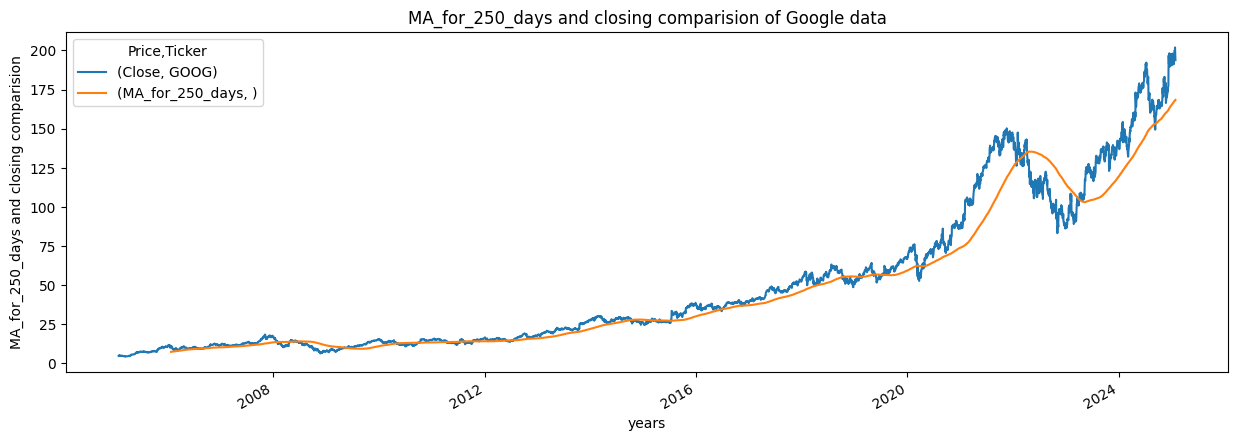

In [22]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days and closing comparision')

<Figure size 640x480 with 0 Axes>

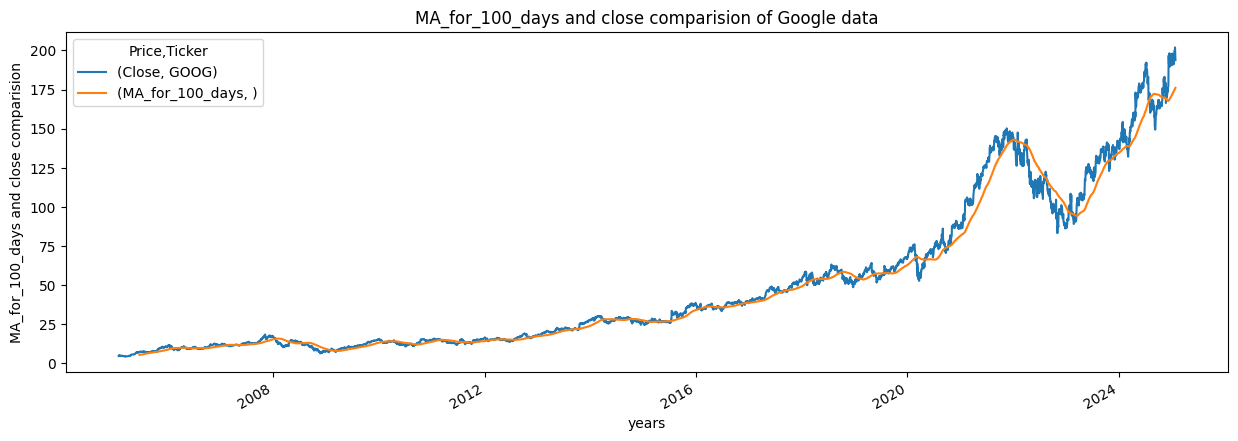

In [23]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days and close comparision')

<Figure size 640x480 with 0 Axes>

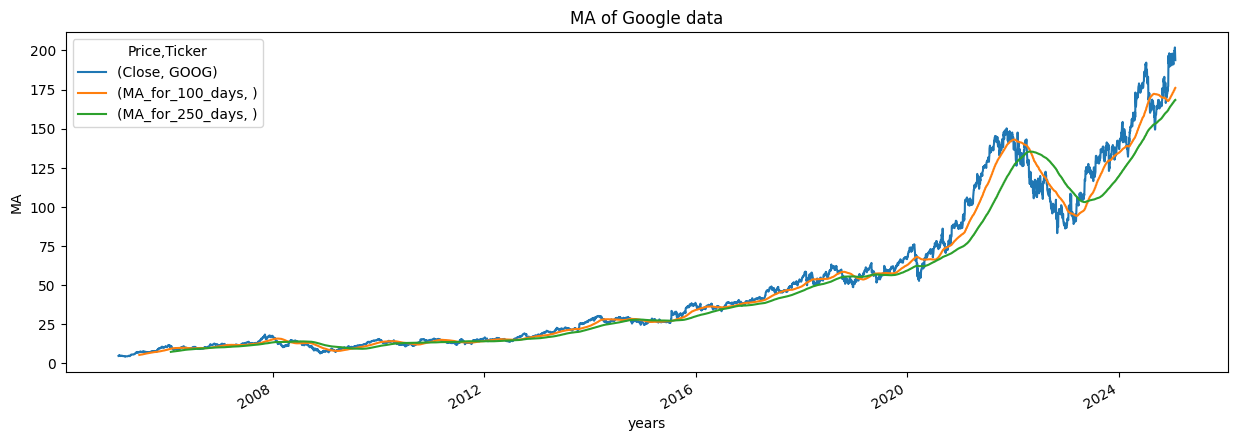

In [24]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [25]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-01-28,4.723758,NaN
2005-01-31,4.854795,0.027740
2005-02-01,4.762473,-0.019017
2005-02-02,5.111406,0.073267
2005-02-03,5.233012,0.023791


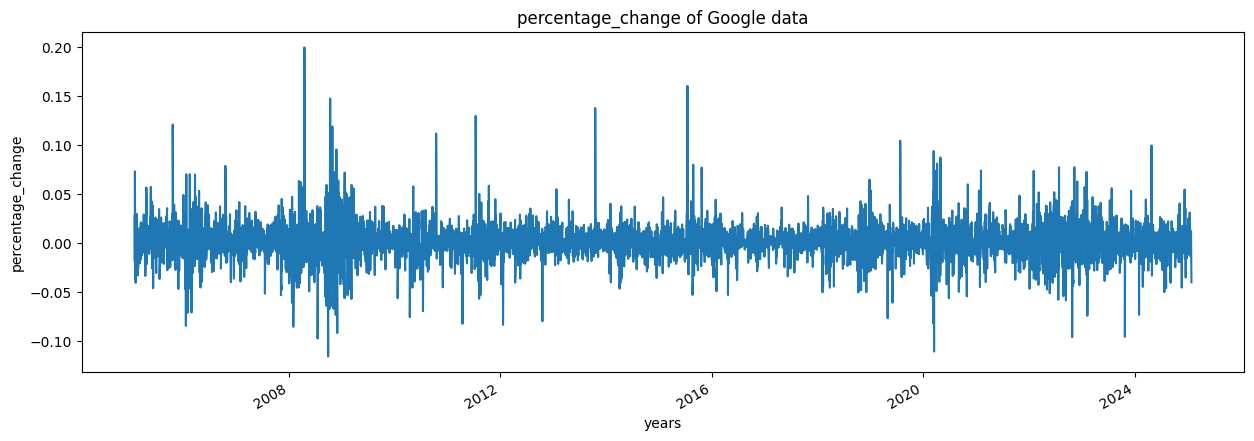

In [26]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [27]:
close_price=google_data[['Close']]

In [28]:
max(close_price.values),min(close_price.values)

(array([201.8999939]), array([4.34281063]))

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00192829],
       [0.00259157],
       [0.00212426],
       ...,
       [0.9882566 ],
       [1.        ],
       [0.95884741]])

In [30]:
len(scaled_data)

5031

In [31]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[1.92828783e-03],
        [2.59157305e-03],
        [2.12425825e-03],
        [3.89049734e-03],
        [4.50604505e-03],
        [3.68950409e-03],
        [2.64307104e-03],
        [2.97094832e-03],
        [2.08406104e-03],
        [1.63182200e-03],
        [1.55895824e-03],
        [2.26118555e-03],
        [2.54257803e-03],
        [2.94205432e-03],
        [2.87798837e-03],
        [2.88426873e-03],
        [2.05767484e-03],
        [2.38178439e-03],
        [1.74613566e-03],
        [1.36675797e-03],
        [1.63307711e-03],
        [1.39062431e-03],
        [1.28008080e-03],
        [1.50996564e-03],
        [1.37052571e-03],
        [1.73608516e-03],
        [1.28258860e-03],
        [7.98947753e-04],
        [6.26846090e-04],
        [3.52991487e-04],
        [0.00000000e+00],
        [4.54746840e-04],
        [7.66266709e-05],
        [5.40166498e-04],
        [6.34381557e-04],
        [7.39909470e-04],
        [4.53489320e-04],
        [5.01224402e-04],
        [5.3

In [33]:
int(len(x_data)*0.7)

3451

In [34]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [37]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))  
model.add(LSTM(128, return_sequences=True))  
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [51]:
model.fit(x_train, y_train, batch_size=2, epochs = 4)

Epoch 1/4
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 98s 56ms/step - loss: 1.4430e-05
Epoch 2/4
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 97s 56ms/step - loss: 1.6426e-05
Epoch 3/4
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 98s 57ms/step - loss: 1.8275e-05
Epoch 4/4
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 101s 59ms/step - loss: 1.7333e-05


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [41]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [42]:
predictions

array([[0.25930855],
       [0.26371738],
       [0.27019292],
       ...,
       [0.88992244],
       [0.8856033 ],
       [0.8887495 ]], dtype=float32)

In [43]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 55.571075],
       [ 56.442074],
       [ 57.721363],
       ...,
       [180.15338 ],
       [179.30011 ],
       [179.92166 ]], dtype=float32)

In [44]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.57752228],
       [ 59.4464035 ],
       [ 59.45238113],
       ...,
       [199.58000183],
       [201.8999939 ],
       [193.77000427]])

In [45]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))


In [46]:
rmse

7.907994057330053

In [47]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-03-11,58.577522,55.571075
2019-03-12,59.446404,56.442074
2019-03-13,59.452381,57.721363
2019-03-14,59.065273,58.365616
2019-03-15,59.010963,58.173283


<Figure size 640x480 with 0 Axes>

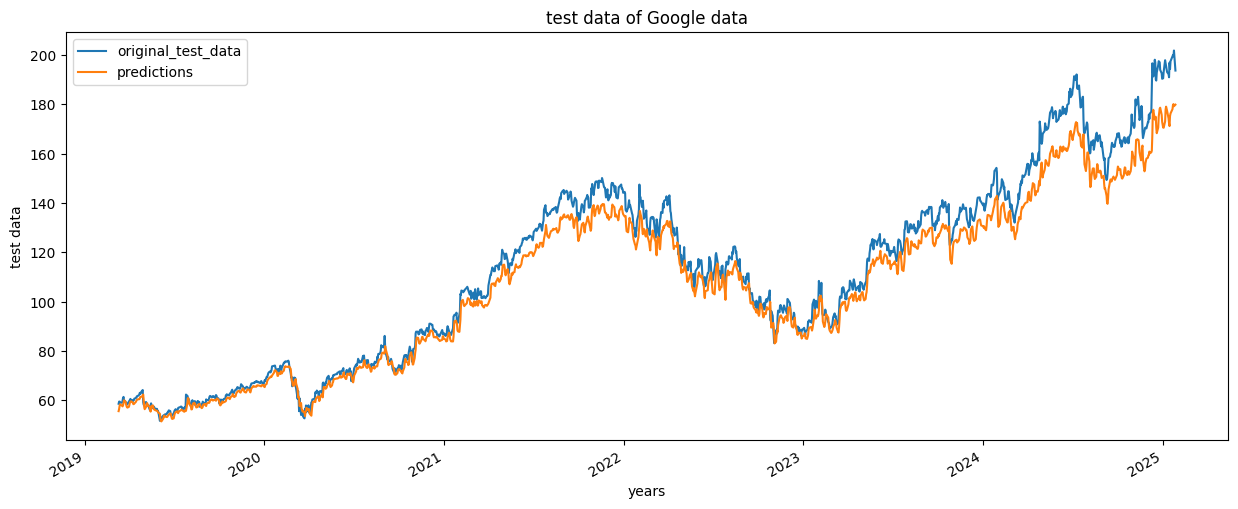

In [48]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

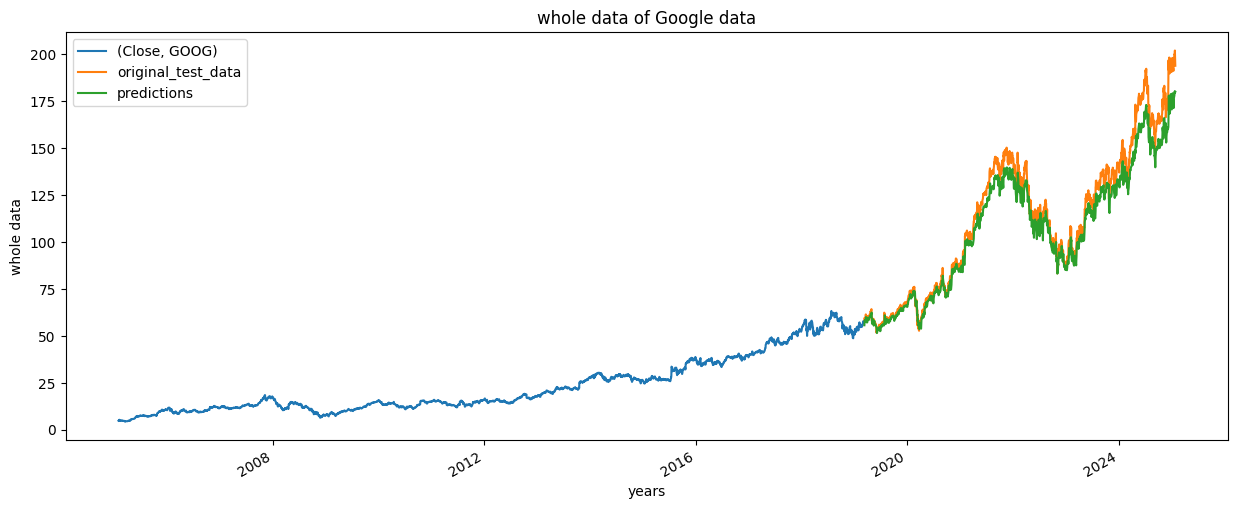

In [49]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [50]:
model.save("stock_price_model.keras")
